In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np
from pmdarima import auto_arima

In [2]:
data = pd.read_csv('Tesla.csv - Tesla.csv')

In [3]:
data

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.000000,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.420000,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.920000,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
...,...,...,...,...,...,...,...
1687,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
1688,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
1689,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600,255.729996
1690,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400,262.049988


In [4]:
# Ensure the date column is in datetime format
data['Date'] = pd.to_datetime(data['Date'])

In [5]:
# Filter the dataset for the year 2012
tesla_data = data[data['Date'].dt.year == 2013]

In [6]:
# Save the filtered dataset to a new file 
#tesla_data.to_csv('tesla_data1.csv', index=False)

In [7]:
#tesla_data1 = pd.read_csv('tesla_data1.csv')

In [8]:
tesla_data

,Date,Open,High,Low,Close,Volume,Adj Close
632,2013-01-02,35.000000,35.450001,34.709999,35.360001,1194800,35.360001
633,2013-01-03,35.180000,35.450001,34.750000,34.770000,742000,34.770000
634,2013-01-04,34.799999,34.799999,33.919998,34.400002,674000,34.400002
635,2013-01-07,34.799999,34.799999,33.900002,34.340000,442000,34.340000
636,2013-01-08,34.500000,34.500000,33.110001,33.680000,1284000,33.680000
...,...,...,...,...,...,...,...
879,2013-12-24,150.000000,154.970001,149.820007,151.410004,9941500,151.410004
880,2013-12-26,155.039993,158.000000,154.289993,155.500000,7129500,155.500000
881,2013-12-27,155.300003,155.500000,150.800003,151.119995,5460200,151.119995
882,2013-12-30,151.119995,154.809998,150.750000,152.440002,4467500,152.440002


In [9]:
tesla_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252 entries, 632 to 883
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       252 non-null    datetime64[ns]
 1   Open       252 non-null    float64       
 2   High       252 non-null    float64       
 3   Low        252 non-null    float64       
 4   Close      252 non-null    float64       
 5   Volume     252 non-null    int64         
 6   Adj Close  252 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 15.8 KB


In [10]:
# Set the 'Date' column as the index
tesla_data.set_index('Date', inplace=True)

In [11]:
print(tesla_data.isnull().sum())

Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64


In [12]:
print(tesla_data.index.min(), tesla_data.index.max())

2013-01-02 00:00:00 2013-12-31 00:00:00


# What's the change in stock's price over time?

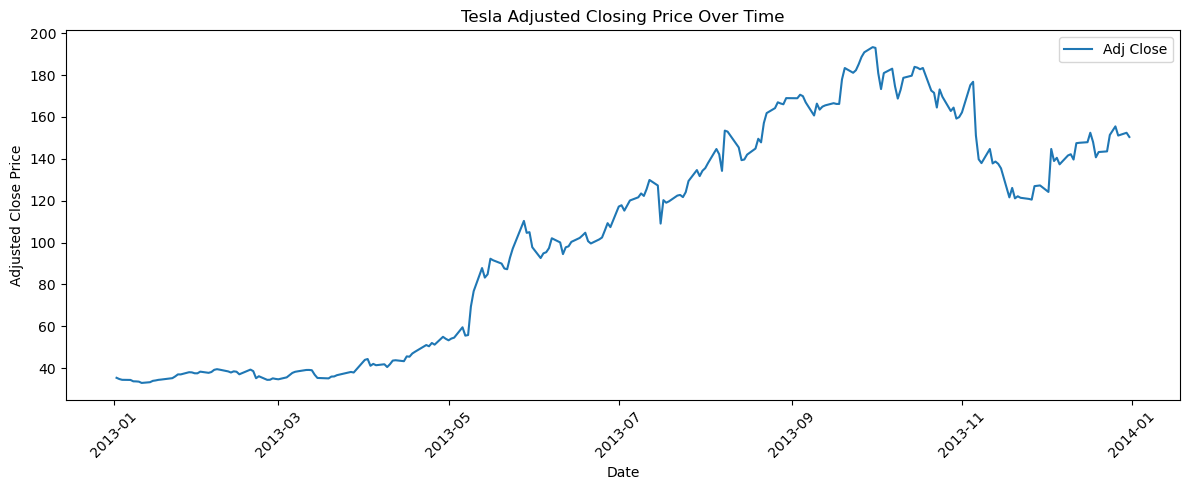

In [13]:
# Plot the Adjusted Closing Price
plt.figure(figsize=(12, 5))
plt.plot(tesla_data.index, tesla_data['Adj Close'], label='Adj Close')
plt.title('Tesla Adjusted Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Moving Averages

In [14]:
# Calculate moving averages
tesla_data['MA50'] = tesla_data['Close'].rolling(window=50).mean()
tesla_data['MA200'] = tesla_data['Close'].rolling(window=200).mean()

C:\Users\mahen\AppData\Local\Temp\ipykernel_21512\1896748425.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tesla_data['MA50'] = tesla_data['Close'].rolling(window=50).mean()
C:\Users\mahen\AppData\Local\Temp\ipykernel_21512\1896748425.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tesla_data['MA200'] = tesla_data['Close'].rolling(window=200).mean()


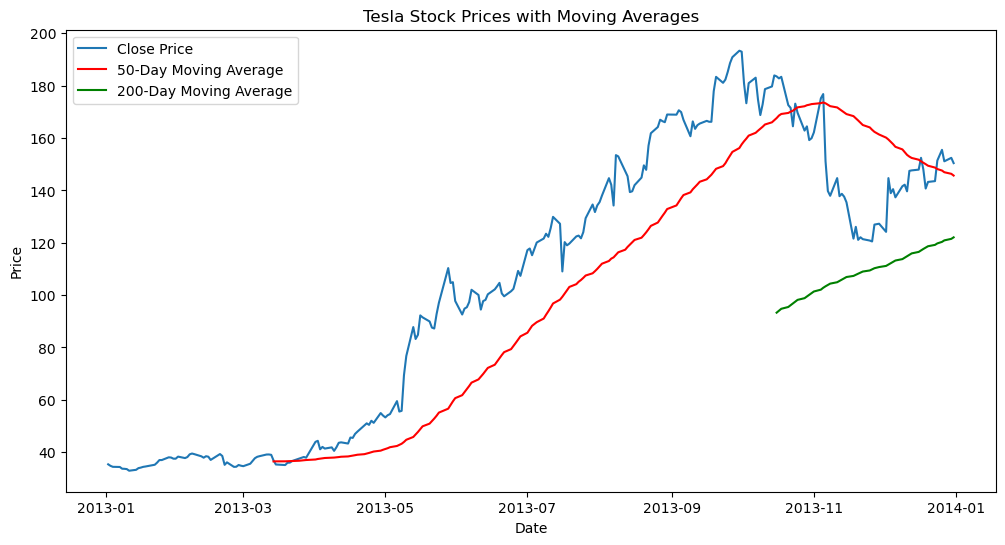

In [15]:
# Plot
plt.figure(figsize=(12, 6))
plt.plot(tesla_data['Close'], label='Close Price')
plt.plot(tesla_data['MA50'], label='50-Day Moving Average', color='red')
plt.plot(tesla_data['MA200'], label='200-Day Moving Average', color='green')
plt.title('Tesla Stock Prices with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Daily Returns

In [16]:
# Calculate daily returns
tesla_data['Daily Return'] = tesla_data['Adj Close'].pct_change()

C:\Users\mahen\AppData\Local\Temp\ipykernel_21512\870803293.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tesla_data['Daily Return'] = tesla_data['Adj Close'].pct_change()


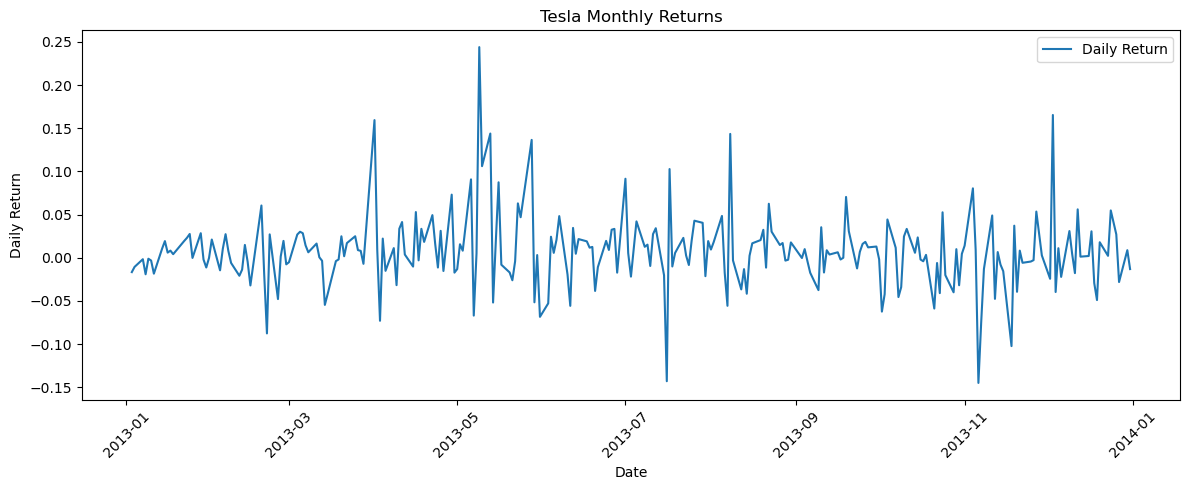

In [17]:
# Plot the daily returns
plt.figure(figsize=(12, 5))
plt.plot(tesla_data.index, tesla_data['Daily Return'], label='Daily Return')
plt.title('Tesla Monthly Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Volume Traded

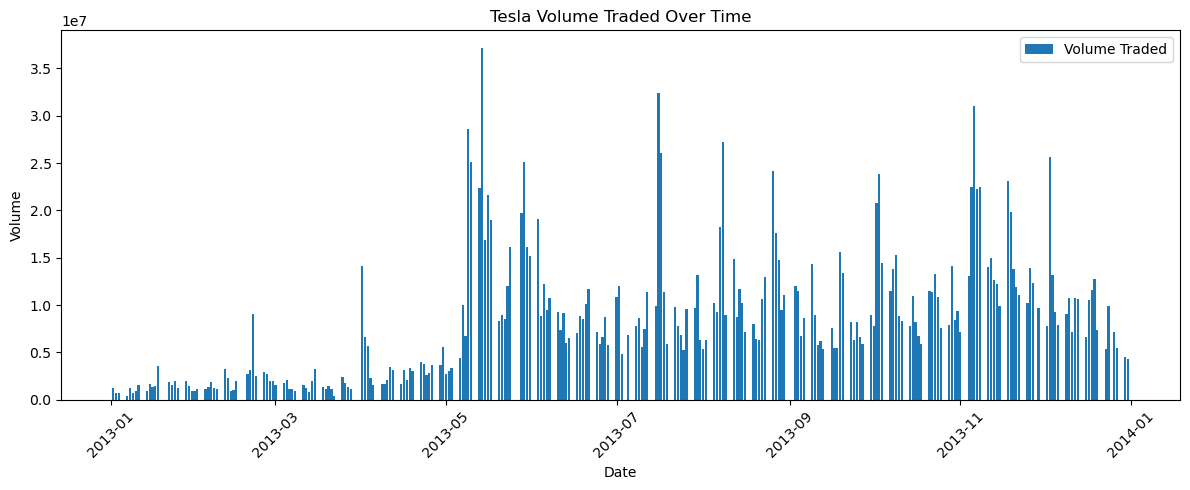

In [18]:
# Plot the volume traded
plt.figure(figsize=(12, 5))
plt.bar(tesla_data.index, tesla_data['Volume'], label='Volume Traded')
plt.title('Tesla Volume Traded Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Candlestick Chart

In [19]:
import mplfinance as mpf

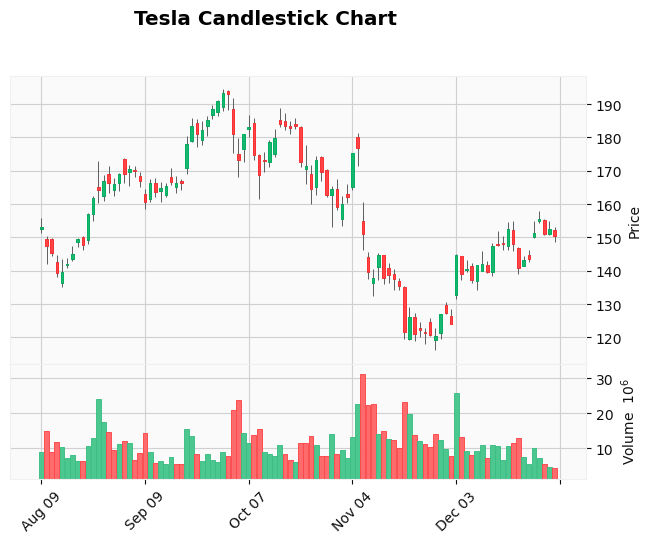

In [20]:
# Plotting the candlestick chart
mpf.plot(tesla_data[-100:], type='candle', volume=True, style='yahoo', title='Tesla Candlestick Chart')

C:\Users\mahen\AppData\Local\Temp\ipykernel_21512\2548523768.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tesla_data['Cumulative Return'] = (1 + tesla_data['Daily Return']).cumprod()


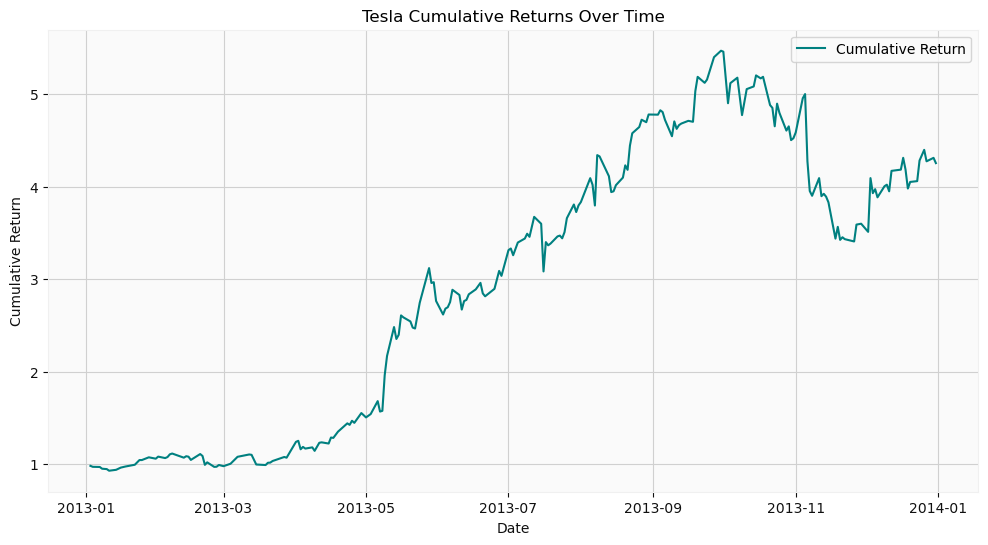

In [21]:
# Calculate cumulative returns
tesla_data['Cumulative Return'] = (1 + tesla_data['Daily Return']).cumprod()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(tesla_data['Cumulative Return'], label='Cumulative Return', color='teal')
plt.title('Tesla Cumulative Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()

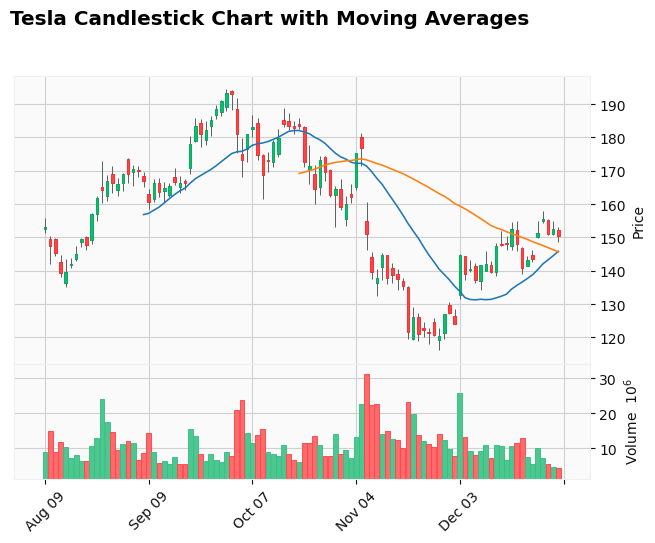

In [23]:
# Resample data to monthly frequency (optional)
monthly_data = tesla_data.resample('M').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum'
})

# Plotting candlestick chart with volume
mpf.plot(tesla_data[-100:], type='candle', volume=True, mav=(20,50), style='yahoo', title='Tesla Candlestick Chart with Moving Averages')

# Bollinger Bands

C:\Users\mahen\AppData\Local\Temp\ipykernel_21512\40022096.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tesla_data['MA20'] = tesla_data['Close'].rolling(window=20).mean()
C:\Users\mahen\AppData\Local\Temp\ipykernel_21512\40022096.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tesla_data['BB_up'] = tesla_data['MA20'] + 2*tesla_data['Close'].rolling(window=20).std()
C:\Users\mahen\AppData\Local\Temp\ipykernel_21512\40022096.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

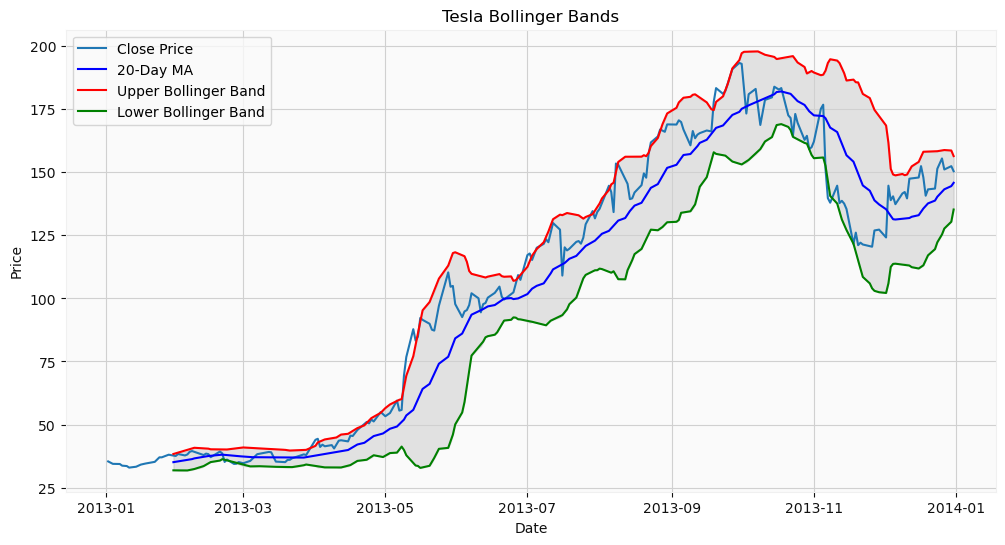

In [24]:
# Calculate Bollinger Bands
tesla_data['MA20'] = tesla_data['Close'].rolling(window=20).mean()
tesla_data['BB_up'] = tesla_data['MA20'] + 2*tesla_data['Close'].rolling(window=20).std()
tesla_data['BB_down'] = tesla_data['MA20'] - 2*tesla_data['Close'].rolling(window=20).std()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(tesla_data['Close'], label='Close Price')
plt.plot(tesla_data['MA20'], label='20-Day MA', color='blue')
plt.plot(tesla_data['BB_up'], label='Upper Bollinger Band', color='red')
plt.plot(tesla_data['BB_down'], label='Lower Bollinger Band', color='green')
plt.fill_between(tesla_data.index, tesla_data['BB_down'], tesla_data['BB_up'], color='gray', alpha=0.2)
plt.title('Tesla Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# MACD (Moving Average Convergence Divergence)

C:\Users\mahen\AppData\Local\Temp\ipykernel_21512\1835389114.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tesla_data['EMA12'] = tesla_data['Close'].ewm(span=12, adjust=False).mean()
C:\Users\mahen\AppData\Local\Temp\ipykernel_21512\1835389114.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tesla_data['EMA26'] = tesla_data['Close'].ewm(span=26, adjust=False).mean()
C:\Users\mahen\AppData\Local\Temp\ipykernel_21512\1835389114.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

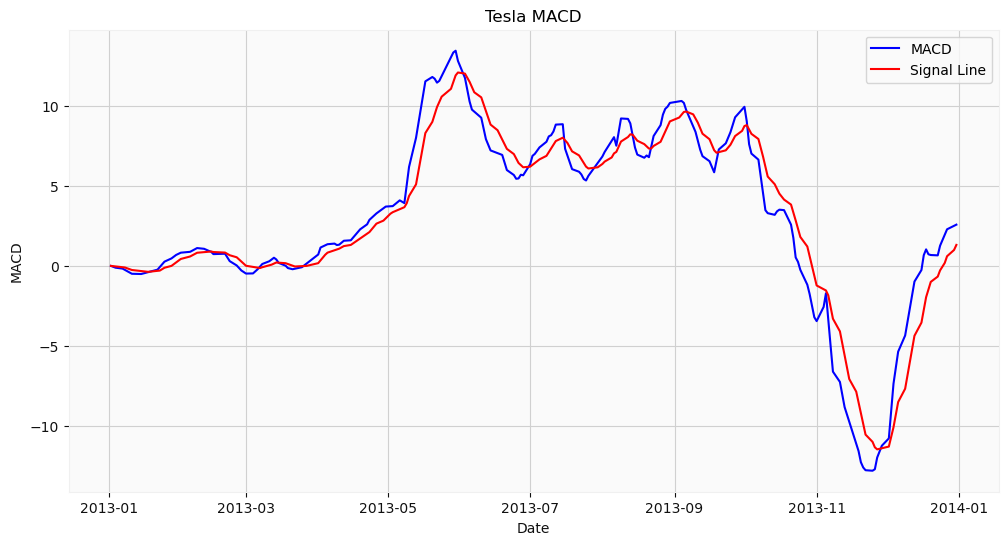

In [25]:
# Calculate MACD
tesla_data['EMA12'] = tesla_data['Close'].ewm(span=12, adjust=False).mean()
tesla_data['EMA26'] = tesla_data['Close'].ewm(span=26, adjust=False).mean()
tesla_data['MACD'] = tesla_data['EMA12'] - tesla_data['EMA26']
tesla_data['Signal'] = tesla_data['MACD'].ewm(span=9, adjust=False).mean()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(tesla_data['MACD'], label='MACD', color='blue')
plt.plot(tesla_data['Signal'], label='Signal Line', color='red')
plt.title('Tesla MACD')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()
plt.show()

# ACF PLOT

<Figure size 1000x500 with 0 Axes>

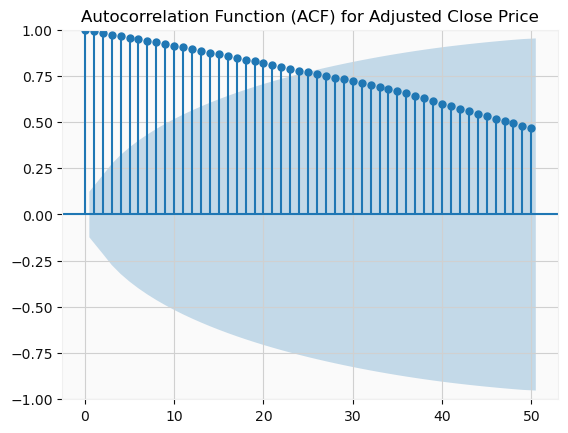

In [26]:
# Plot the ACF for 'Adj Close'
plt.figure(figsize=(10, 5))
plot_acf(tesla_data['Adj Close'].dropna(), lags=50)
plt.title('Autocorrelation Function (ACF) for Adjusted Close Price')
plt.show()

# ARMIA MODELING

In [27]:
from statsmodels.tsa.arima.model import ARIMA

In [31]:
# Use the first 80% of the data for training and the last 20% for testing
split_index = int(len(tesla_data) * 0.8)# We will use the 'Close' prices for forecasting
#train_series = train['Close']
#test_series = test['Close']
train = tesla_data.iloc[:split_index]
test = tesla_data.iloc[split_index:]

In [32]:
# We will use the 'Close' prices for forecasting
train_series = train['Close']
test_series = test['Close']

In [33]:
# Fit a more manually specified ARIMA model
model = ARIMA(train_series, order=(1,1,1))  # You can experiment with different (p,d,q) orders
model_fit = model.fit()

C:\Users\mahen\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mahen\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mahen\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [34]:
# Forecast
forecast, conf_int = model_fit.get_forecast(steps=len(test_series)).summary_frame(alpha=0.05).iloc[:, :2].values.T

C:\Users\mahen\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\mahen\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [35]:
# Convert forecast to a Series
forecast_series = pd.Series(forecast, index=test_series.index)

In [36]:
# Debugging: Check forecast data
print(f"Forecast Values:\n{forecast_series.head()}")
print(f"Conf Int:\n{conf_int[:5]}")

Forecast Values:
Date
2013-10-18    182.934793
2013-10-21    182.851274
2013-10-22    182.903024
2013-10-23    182.870959
2013-10-24    182.890827
dtype: float64
Conf Int:
[4.03279323 5.9336052  7.24339215 8.41193918 9.40265358]


In [37]:
# Generate future dates for plotting
last_date = tesla_data.index[-1]
forecast_index = pd.date_range(start=last_date + pd.DateOffset(1), periods=30, freq='D')
print("Forecast index:", forecast_index)

Forecast index: DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
               '2014-01-05', '2014-01-06', '2014-01-07', '2014-01-08',
               '2014-01-09', '2014-01-10', '2014-01-11', '2014-01-12',
               '2014-01-13', '2014-01-14', '2014-01-15', '2014-01-16',
               '2014-01-17', '2014-01-18', '2014-01-19', '2014-01-20',
               '2014-01-21', '2014-01-22', '2014-01-23', '2014-01-24',
               '2014-01-25', '2014-01-26', '2014-01-27', '2014-01-28',
               '2014-01-29', '2014-01-30'],
              dtype='datetime64[ns]', freq='D')


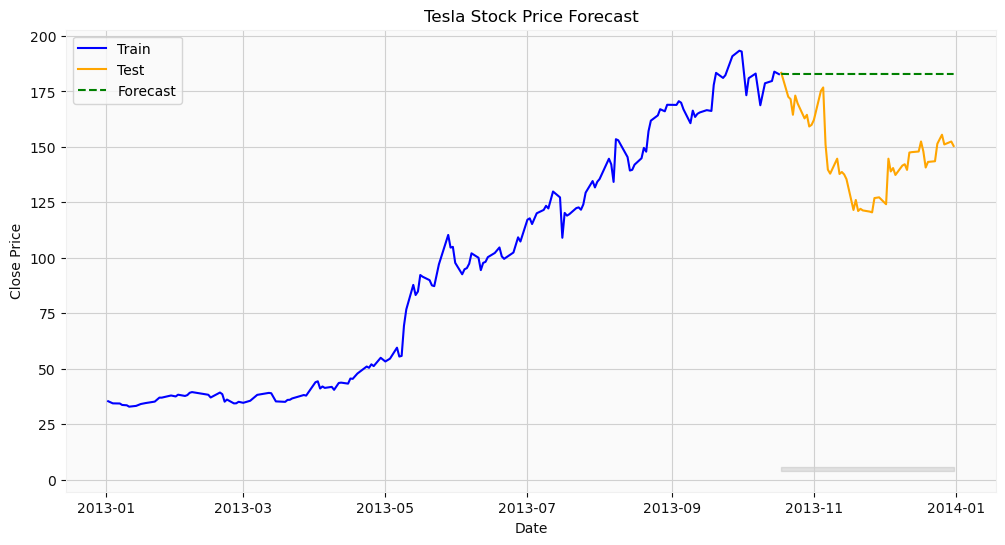

In [38]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train_series, label='Train', color='blue')
plt.plot(test_series, label='Test', color='orange')
plt.plot(forecast_series, label='Forecast', color='green', linestyle='--')
plt.fill_between(forecast_series.index, conf_int[0], conf_int[1], color='gray', alpha=0.2)
plt.legend()
plt.title('Tesla Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

# SARIMA MODELING


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1129.296, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1132.810, Time=0.24 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1132.869, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1134.077, Time=0.05 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1130.857, Time=0.16 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1130.940, Time=0.14 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1131.490, Time=0.39 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1131.242, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1131.219, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1131.752, Time=0.14 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12] intercept
Total fit time: 1.555 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  202
Model:               SARIMAX(0, 1, 0)   Log Likelih

C:\Users\mahen\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\mahen\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


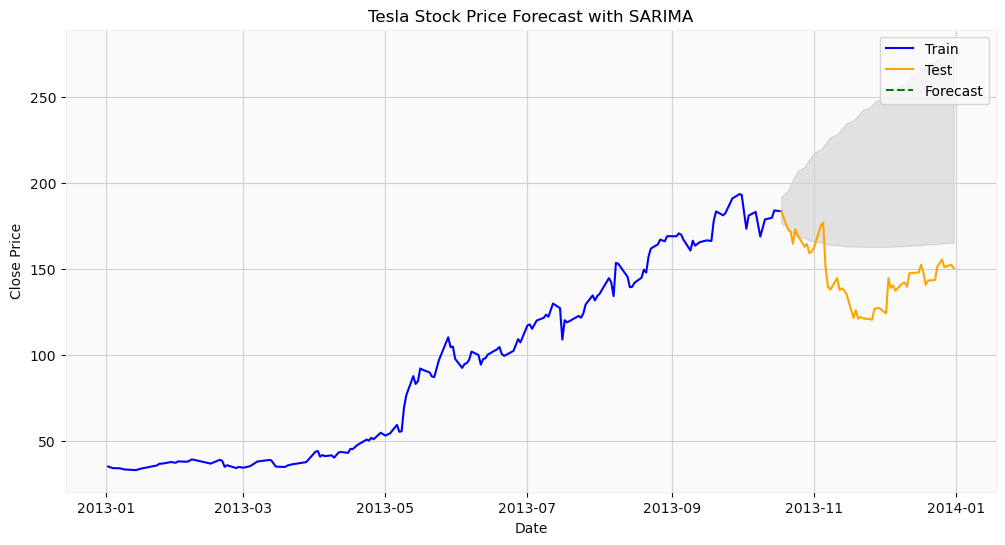

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

# Assuming the 'tesla_data' DataFrame is already loaded

# Set the date as index
tesla_data.index = pd.to_datetime(tesla_data.index)

# Separate the data into training and testing sets
train_data = tesla_data['2013-01-01':'2013-10-18']['Close']
test_data = tesla_data['2013-10-18':'2013-12-31']['Close']

# Auto ARIMA with seasonality, forcing the model to start with simpler parameters
auto_model = auto_arima(
    train_data,
    start_p=0, start_q=0,
    max_p=5, max_q=5,
    seasonal=True,
    m=12,  # Monthly data; adjust m based on your data
    start_P=0, start_Q=0,
    max_P=2, max_Q=2,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True,
    maxiter=1000  # Increase the number of iterations to help with convergence
)

# Print the summary of the best model found by Auto ARIMA
print(auto_model.summary())

# Forecast using the best model found
forecast, conf_int = auto_model.predict(n_periods=len(test_data), return_conf_int=True)
forecast_series = pd.Series(forecast, index=test_data.index)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Train', color='blue')
plt.plot(test_data, label='Test', color='orange')
plt.plot(forecast_series, label='Forecast', color='green', linestyle='--')
plt.fill_between(forecast_series.index, conf_int[:, 0], conf_int[:, 1], color='gray', alpha=0.2)
plt.legend()
plt.title('Tesla Stock Price Forecast with SARIMA')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

# SARIMAX MODEL

In [44]:
# Create a complete date range
full_range = pd.date_range(start=tesla_data.index.min(), end=tesla_data.index.max(), freq='B')

# Reindex the DataFrame with the full date range
tesla_data = tesla_data.reindex(full_range)

# Fill missing values
tesla_data.fillna(method='ffill', inplace=True)  # Forward fill

# Set frequency and handle missing values
tesla_data = tesla_data.asfreq('B')
tesla_data.fillna(method='ffill', inplace=True)

C:\Users\mahen\AppData\Local\Temp\ipykernel_21512\3405926824.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  tesla_data.fillna(method='ffill', inplace=True)  # Forward fill
C:\Users\mahen\AppData\Local\Temp\ipykernel_21512\3405926824.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  tesla_data.fillna(method='ffill', inplace=True)


C:\Users\mahen\anaconda3\Lib\site-packages\pmdarima\arima\_validation.py:76: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  warnings.warn('stepwise model cannot be fit in parallel (n_jobs=%i). '


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1504.466, Time=0.08 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1170.067, Time=0.80 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1337.684, Time=0.81 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1596.015, Time=0.05 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=1227.173, Time=0.14 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=1145.228, Time=1.70 sec
 ARIMA(1,0,0)(3,1,0)[12] intercept   : AIC=1147.027, Time=2.83 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=4.41 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=2.64 sec
 ARIMA(1,0,0)(3,1,1)[12] intercept   : AIC=inf, Time=7.37 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=1505.423, Time=1.22 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=1147.026, Time=1.79 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=1146.942, Time=2.11 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=1338.986, Time=1.63 sec
 ARIMA(2,0,1)(2,1,0)[12] intercept

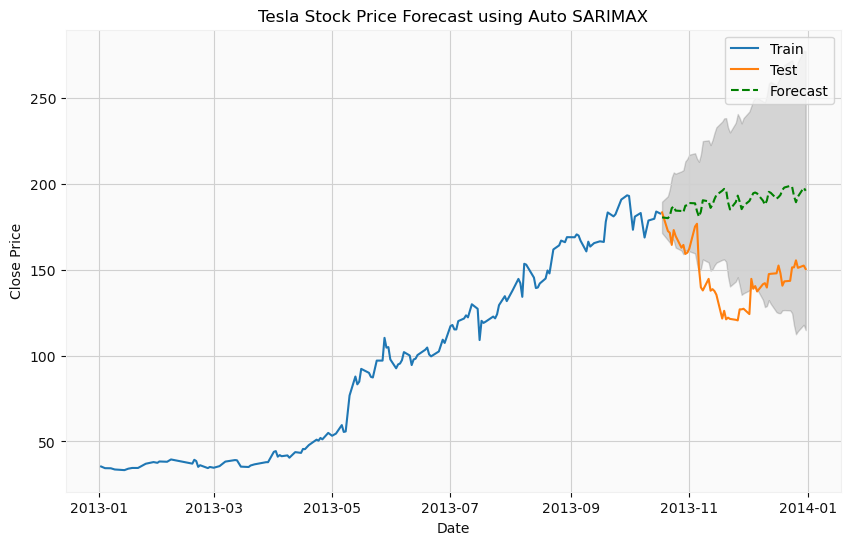

In [45]:
import pmdarima as pm
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Assuming 'Close' is the column of interest
train_data = tesla_data['2013-01-01':'2013-10-17']['Close']
test_data = tesla_data['2013-10-18':]['Close']

# Fit auto_arima model on the 'Close' column
auto_model = pm.auto_arima(
    train_data,
    start_p=0, start_q=0,
    max_p=5, max_q=5,
    seasonal=True, m=12,
    start_P=0, start_Q=0,
    max_P=5, max_Q=5,
    stepwise=True,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    D=1, max_D=2,
    max_order=None,
    test='adf',  # use ADF test to determine 'd'
    seasonal_test='ocsb',  # use OCSB test to determine 'D'
    n_jobs=-1,
    random_state=20
)

# Print the best model parameters
#print(auto_model.summary())

# Fit the SARIMAX model with the best parameters
best_model = SARIMAX(train_data,
                     order=auto_model.order,
                     seasonal_order=auto_model.seasonal_order,
                     enforce_stationarity=False,
                     enforce_invertibility=False).fit()

# Forecast
forecast = best_model.get_forecast(steps=len(test_data))
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data, label='Train')
plt.plot(test_data.index, test_data, label='Test')
plt.plot(forecast_values.index, forecast_values, label='Forecast', linestyle='--', color='green')
plt.fill_between(forecast_values.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='k', alpha=.15)
plt.title('Tesla Stock Price Forecast using Auto SARIMAX')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()